# Importing the thinkdsp library as dsp, numpy as np and matplotlib as plt on top of that we need pydub library and import the AudioSegment so we can overlay the sound waves

In [91]:
!wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
import thinkdsp as dsp
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

--2023-01-08 12:08:45--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2023-01-08 12:08:45--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py.1’

thinkdsp.py.1       100%[===================>]  47.55K  --.-KB/s    in 0.01s   

2023-01-08 12:08:45 (4.55 MB/s) - ‘thinkdsp.py.1’ saved [48687/48687]



# Let's check the spectrum of both sounds and look for any corruptions


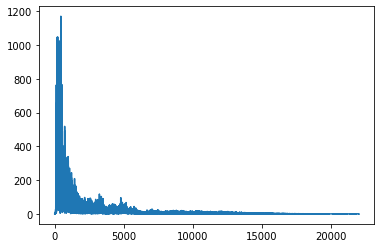

In [92]:
# Load the normal sound file
wave_nor = dsp.read_wave('original_sound.wav')

# By using wave.make_spectrum we can look the spectrum of the wave
nor_spectrum = wave_nor.make_spectrum()

# Show the spectrum
nor_spectrum.plot()

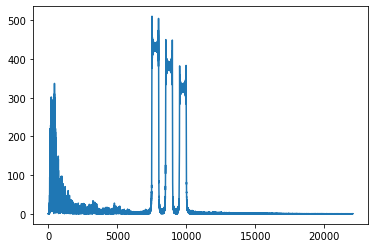

In [93]:
# Load the corrupted sound file
wave_corr = dsp.read_wave('corrupted_sound.wav')

# By using wave.make_spectrum we can look the spectrum of the wave
corr_spectrum = wave_corr.make_spectrum()

# Show the spectrum
corr_spectrum.plot()

If we compare the both spectrums we can clearly see the corrupted_sound file has more sound waves bewteen 5000 and 10000 than normal one indicating that it is indeed corrupted

# Let's compare the sound waves for both sound files

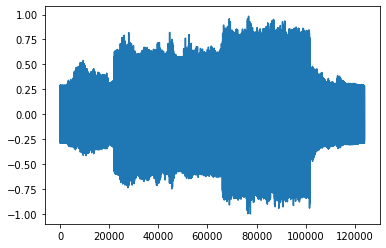

In [94]:
# Load the corrupted sound file
wave_corr = dsp.read_wave('corrupted_sound.wav')

# Get the waveform data
ys_corr = wave_corr.ys

# Plot the waveform and play the audio
plt.plot(ys_corr)
plt.show()
wave_corr.make_audio()

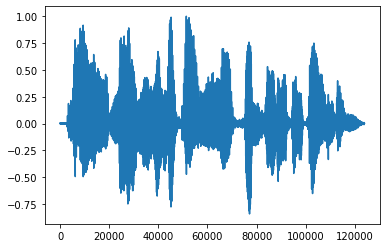

In [95]:
# Load the corrupted sound file
wave_nor = dsp.read_wave('original_sound.wav')

# Get the waveform data
ys_nor = wave_nor.ys

# Plot the waveform and play the audio
plt.plot(ys_nor)
plt.show()
wave_nor.make_audio()

And from here it's more clear that there are more sound waves in the corrupted sound file than normal sound file and if we listen the both files we can clearly hear that there is a sizzle behind the corrupted one

# Question 1
By using the thinkdsp library, I listen both sound files and analyze the waveform for any audible differences or issues. This helped to identify which file is corrupted, and may also give you some clues about the source of the corruption.

# Question 2
Fix the corruption

In [136]:
# Load the corrupted sound file
wave_corr = dsp.read_wave('corrupted_sound.wav')

# Get the corrupted sound's spectrum as corr_spectrum
corr_spectrum = wave_corr.make_spectrum()

#Remove all the sound after 12500 frequency
corr_spectrum.hs[12500:] = 0.

#We remove after 12500 because after looking the spectrums of the both sound files we can clearly say that after 7000,8000 frequency the sound get's corrupted
#(I used try and check method for this number but I knew I had do remove all the sounds after 7000,8000 frequency and I slowly go up from there)

# Question 3

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


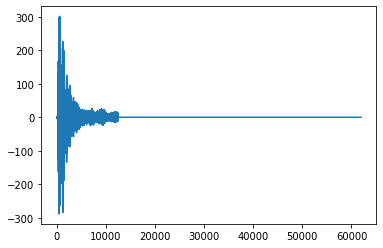

In [135]:
#Plot the spectrum of the corrupted (but removed some sound) spectrum
plt.plot(corr_spectrum.hs)

#Make wave using this corrupted (but removed some sound) spectrum named clean_wave
clean_wave = corr_spectrum.make_wave()

#Make audio from that wave
clean_wave.make_audio()

Possible Solution 2

In [137]:
# Create a function that subtracts 2 sounds and returns the new sound
def subtract_sounds(input_file_1, input_file_2, output_file):
    # Load the audio files into memory
    sound_1 = AudioSegment.from_file(input_file_1, format='wav')
    sound_2 = AudioSegment.from_file(input_file_2, format='wav')

    # Subtract the second sound from the first
    result = sound_1.overlay(sound_2, loop=True, times=1, position=0, gain_during_overlay=-500)

    # Save the result to an output file
    result.export(output_file, format='wav')

subtract_sounds('corrupted_sound.wav', 'original_sound.wav', 'clear_sound.wav')

# Load the normal sound file
wave_clear = dsp.read_wave('clear_sound.wav')
wave_clear.make_audio()